**import libraries**

In [11]:
from script import *

**load dataset**

In [2]:
# data = pd.read_csv('datasets/employee_reviews_sub.csv')

In [3]:
# data.dtypes

Unnamed: 0                      int64
company                        object
location                       object
dates                          object
job-title                      object
overall-ratings               float64
work-balance-stars             object
culture-values-stars           object
carrer-opportunities-stars     object
comp-benefit-stars             object
senior-mangemnet-stars         object
helpful-count                   int64
link                           object
dtype: object

In [4]:
# data.head()

,Unnamed: 0,company,location,dates,job-title,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,0,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,1,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,2,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,3,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,4,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


### Data Engeneering

In [44]:
#delete the useless columns
# data = data.drop(['Unnamed: 0'], axis= 1)
# data = data.drop(['link'], axis= 1)

**Average ratings for different feature (by company)**. We use these information to fill the missing values in the rating fields.

In [6]:
# ratings_comp = data[["company", 'overall-ratings', "work-balance-stars", "culture-values-stars", "carrer-opportunities-stars", "comp-benefit-stars", "senior-mangemnet-stars"]].copy()
# ratings_comp.set_index(["company"], inplace=True)
# ratings_comp = ratings_comp[~(ratings_comp[['overall-ratings',"work-balance-stars", "culture-values-stars", "carrer-opportunities-stars", "comp-benefit-stars", "senior-mangemnet-stars"]] == "none").any(axis=1)]
# ratings_comp[['overall-ratings',"work-balance-stars", "culture-values-stars", "carrer-opportunities-stars", "comp-benefit-stars", "senior-mangemnet-stars"]] = ratings_comp[['overall-ratings',"work-balance-stars", "culture-values-stars", "carrer-opportunities-stars", "comp-benefit-stars", "senior-mangemnet-stars"]].apply(pd.to_numeric)
# avg_company = ratings_comp.groupby("company")['overall-ratings',"work-balance-stars", "culture-values-stars", "carrer-opportunities-stars", "comp-benefit-stars", "senior-mangemnet-stars"].mean()
# avg_company.columns = ['Overall Ratings',"Work Balance", "Culture Values", "Career Opportunities", "Company Benefits", "Senior Management"]
# avg_company = avg_company.transpose()
# avg_company

<ipython-input-6-83d9e7432d94>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_company = ratings_comp.groupby("company")['overall-ratings',"work-balance-stars", "culture-values-stars", "carrer-opportunities-stars", "comp-benefit-stars", "senior-mangemnet-stars"].mean()


company,amazon,apple,facebook,google,microsoft,netflix
Overall Ratings,3.605707,3.958919,4.518081,4.378480,3.859934,3.497976
Work Balance,3.010915,3.338017,3.904729,4.004104,3.575086,3.210526
Culture Values,3.532292,4.097873,4.515299,4.359208,3.657359,3.514170
Career Opportunities,3.621241,3.419399,4.365090,4.030692,3.710211,3.157895
Company Benefits,3.710779,4.059036,4.573018,4.427552,4.025453,4.257085
Senior Management,3.171875,3.446916,4.260779,3.871877,3.185432,3.192308


In [7]:
# companies=pd.unique(data['company'])
# #in the following dict are stored the mean values for each comapany and each attribute using the previous dataframe avg_company
# ratings_per_company={company: avg_company.loc[:,company].values for company in companies}  #companies are keys whereas values are the different ratings

# for index,row in tqdm(data.iterrows()):  #for each row in the dataset  
#     company=data.iloc[index,0]  #company name
#     for index_y in range(4,10):  #for each column from overall ratings to helpful-count       
#         if data.iloc[index,index_y]=='none':
#             data.iloc[index,index_y]=round(ratings_per_company.get(company)[index_y-4],1)

67529it [00:44, 1508.31it/s]


In [8]:
# #converting dtypes
# data['culture-values-stars']=pd.to_numeric(data['culture-values-stars'])
# data['work-balance-stars']=pd.to_numeric(data['work-balance-stars'])
# data['carrer-opportunities-stars']=pd.to_numeric(data['carrer-opportunities-stars'])
# data['comp-benefit-stars']=pd.to_numeric(data['comp-benefit-stars'])
# data['senior-mangemnet-stars']=pd.to_numeric(data['senior-mangemnet-stars'])

In [9]:
# #get rid of the row without location
# data= data[data['location']!='none']
# # add a column with the year only
# data['year'] = pd.to_datetime(data['dates'], errors='coerce').dt.year
# #delete the column with the dates
# del data['dates']

In [10]:
# data.head()

,company,location,job-title,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,year
1,google,"Mountain View, CA",Former Employee - Program Manager,4.0,2.0,3.0,3.0,5.0,3.0,2094,2013.0
2,google,"New York, NY",Current Employee - Software Engineer III,5.0,5.0,4.0,5.0,5.0,4.0,949,2014.0
3,google,"Mountain View, CA",Current Employee - Anonymous Employee,5.0,2.0,5.0,5.0,4.0,5.0,498,2015.0
4,google,"Los Angeles, CA",Former Employee - Software Engineer,5.0,5.0,5.0,5.0,5.0,5.0,49,2018.0
5,google,"Mountain View, CA",Former Employee - SDE2,5.0,4.0,4.0,4.0,5.0,4.0,1,2018.0


In [11]:
# #Use the data only with location in California
# data_CA=data['location'].filter(regex='CA$',axis=0)
# california_loc=pd.unique(list(filter(lambda loc:re.findall(r'CA$',loc),data['location'])))
# data_CA=data[data['location'].isin(california_loc)]

Save the processed dataframe into a file

In [12]:
# data_CA.to_csv('processed_employee_reviews.csv')

In [4]:
data = pd.read_csv('processed_employee_reviews.csv')
data = data.drop(['Unnamed: 0'], axis= 1)

## Data analysis and visualization

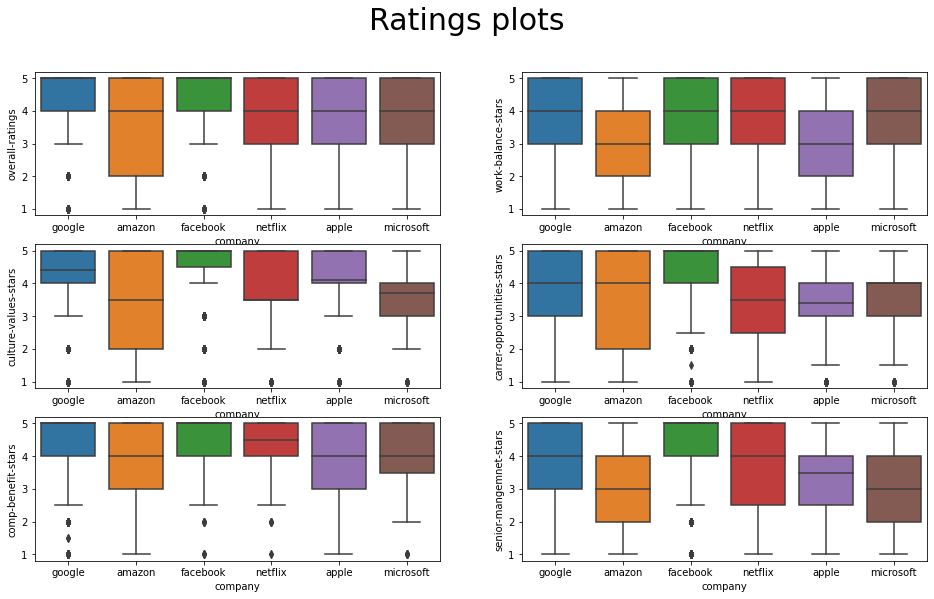

In [14]:
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(16,9))
fig.suptitle('Ratings plots',fontsize=30)
bp(x='company',y='overall-ratings',data=data,ax=axes[0,0])
bp(x='company',y='work-balance-stars',data=data,ax=axes[0,1])
bp(x='company',y='culture-values-stars',data=data,ax=axes[1,0])
bp(x='company',y='carrer-opportunities-stars',data=data,ax=axes[1,1])
bp(x='company',y='comp-benefit-stars',data=data,ax=axes[2,0])
bp(x='company',y='senior-mangemnet-stars',data=data,ax=axes[2,1])
plt.show()

#### Distribution of Reviews by year

/home/eugibaldo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


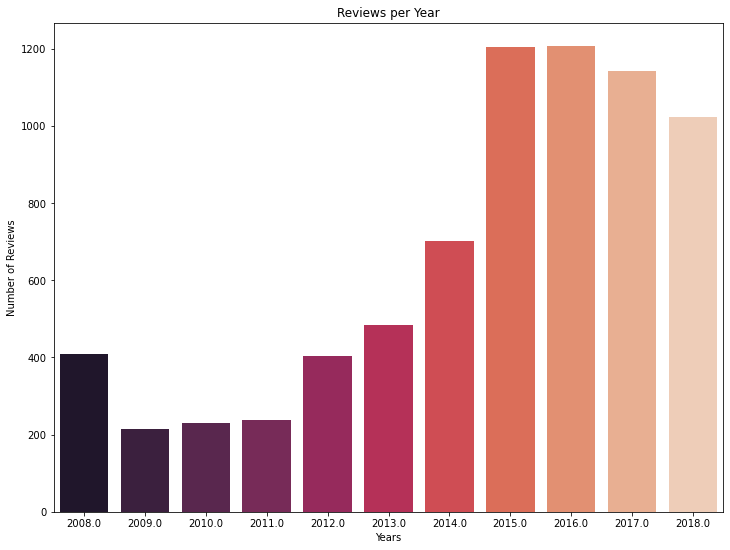

In [15]:
years_count = data_CA['year'].value_counts().sort_index(ascending=True)
years_labels = years_count.index.tolist()
years_index = np.arange(len(years_labels))

plt.figure(figsize=(12, 9))
_ = sns.barplot(years_index, years_count, palette='rocket')
_ = plt.xticks(years_index, years_labels)
_ = plt.xlabel("Years")
_ = plt.ylabel("Number of Reviews")
_ = plt.title("Reviews per Year")

### Which company takes the best treatment for the employees? 

(MAGARI QUESTI PLOT LI METTIAMO TUTTI INSIEME COME E' STATO FATTO PER I BOXPLOT)

In [16]:
def rating_per_company(rating_type, title, color):
    work_ratings = data[['company', rating_type]]
    work_ratings = work_ratings[~(work_ratings[[rating_type]] == "none").any(axis=1)]
    work_ratings[rating_type] = work_ratings[rating_type].apply(pd.to_numeric)
    group = work_ratings.groupby(work_ratings["company"].str.title())[rating_type].mean().reset_index()
    group.sort_values([rating_type],inplace=True)
    group.set_index('company').plot.barh(legend=False, figsize=(12, 10), color=color)
    plt.title('{} Rating'.format(title))
    plt.xlabel('Rating')
    _ = plt.ylabel('Companies')

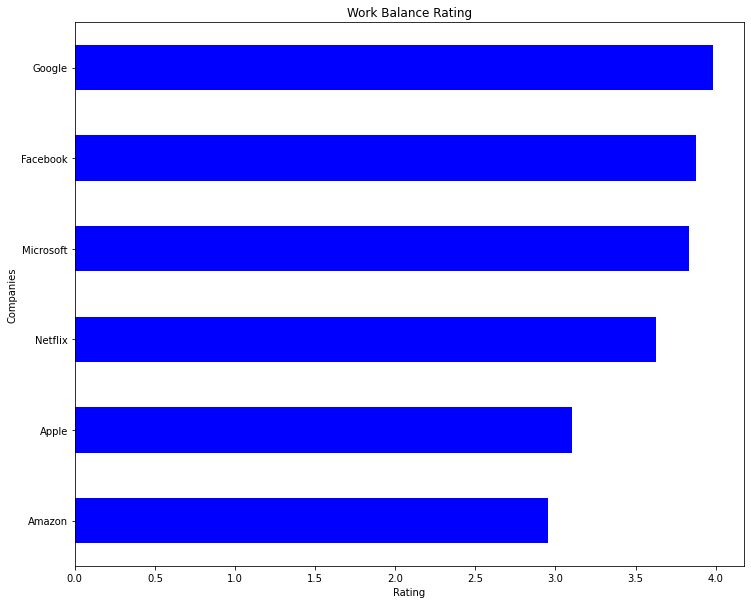

In [17]:
# Which company offers better Work-Life Balance?
rating_per_company('work-balance-stars', "Work Balance", "b")

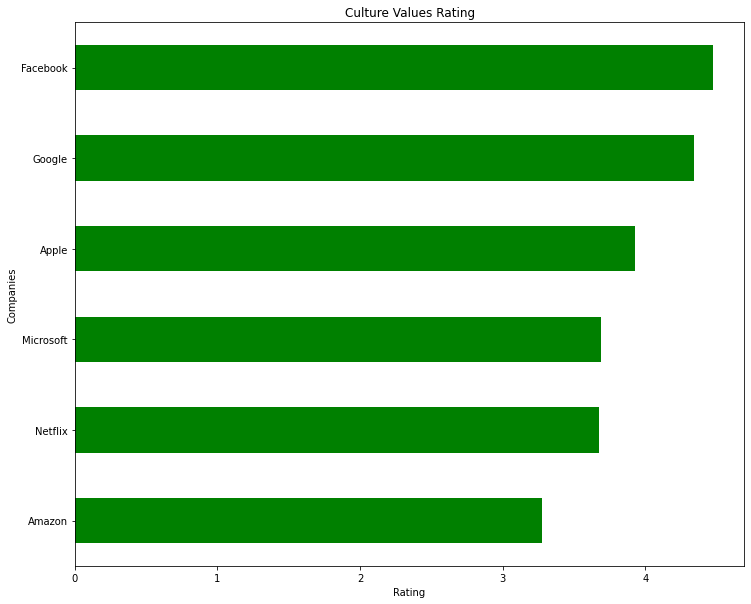

In [18]:
#Which company has better Culture Values?
rating_per_company('culture-values-stars', "Culture Values", "g")

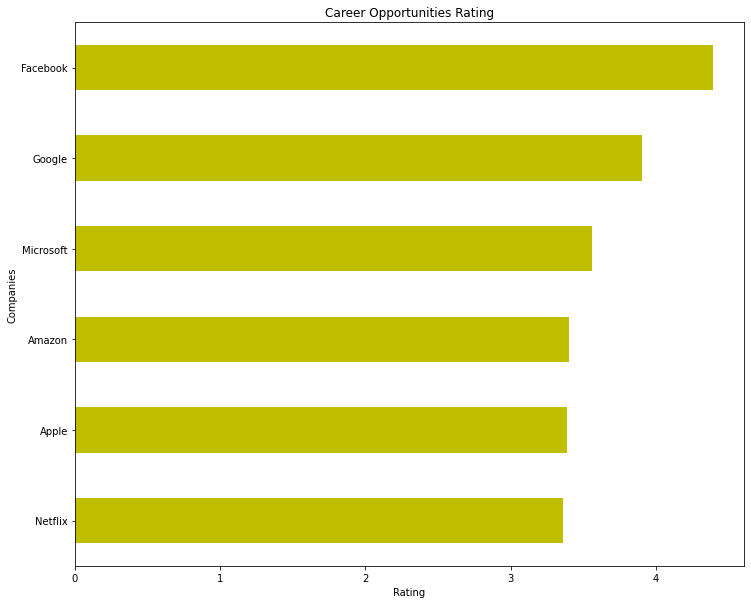

In [19]:
#Which company has better Career Opportunities?
rating_per_company("carrer-opportunities-stars", "Career Opportunities", "y")

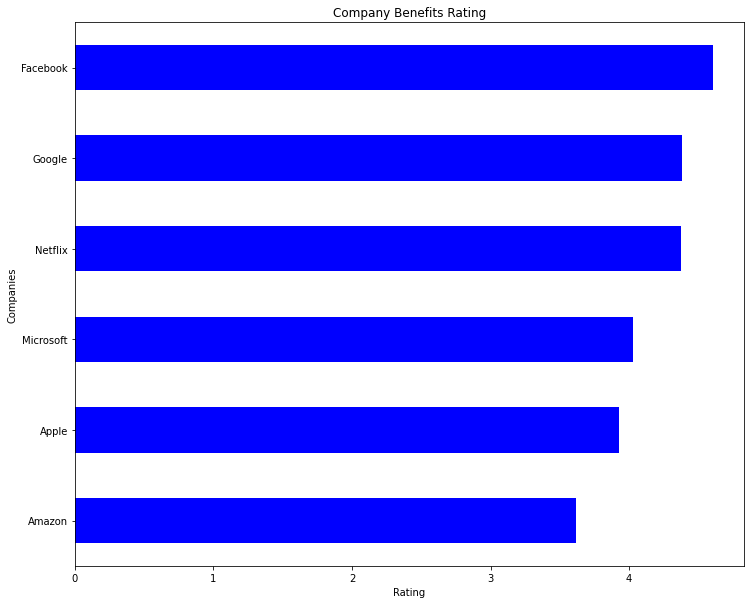

In [20]:
rating_per_company("comp-benefit-stars", "Company Benefits", "b")

## Normalizing the dataframe to explore the correlation between the features

In [21]:
ord_enc = OrdinalEncoder()
data["Company_code"] =ord_enc.fit_transform(data[["company"]])
data["Job_code"]=ord_enc.fit_transform(data[["job-title"]])
data['Locations_code']=ord_enc.fit_transform(data[["location"]])

In [22]:
#delete the categorical&useless columns
data = data.drop(['company'], axis= 1)
data = data.drop(['location'], axis= 1)
data = data.drop(['job-title'], axis= 1)
data = data.drop(['year'], axis= 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #for normalize the values
data_norm= scaler.fit_transform(data)
data_new=pd.DataFrame(data_norm,columns=["overall-ratings","work-balance-stars","culture-values-stars","carrer-opportunities-stars","comp-benefit-stars","senior-mangemnet-stars","helpful-count","Company_code","Job_code","Locations_code"])
data_new.to_csv('normalized_data.csv')

In [8]:
data_new = pd.read_csv('normalized_data.csv')
data_new = data_new.drop(['Unnamed: 0'], axis= 1)

In [9]:
data_new.head()

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,Company_code,Job_code,Locations_code
0,0.75,0.25,0.50,0.50,1.00,0.50,1.000000,0.6,0.830282,0.517949
1,1.00,0.25,1.00,1.00,0.75,1.00,0.237822,0.6,0.020287,0.517949
2,1.00,1.00,1.00,1.00,1.00,1.00,0.023400,0.6,0.922316,0.410256
3,1.00,0.75,0.75,0.75,1.00,0.75,0.000478,0.6,0.851559,0.517949
4,1.00,0.75,1.00,0.75,0.75,0.50,0.000000,0.6,0.020287,0.517949


#### Now that we have only encoded data and the values are normalize, we can explore the correlations 

In [10]:
corr_matrix = data_new.corr()
corr_matrix

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,Company_code,Job_code,Locations_code
overall-ratings,1.000000,0.603002,0.719810,0.717758,0.573054,0.730413,-0.057725,0.153446,-0.149378,0.015109
work-balance-stars,0.603002,1.000000,0.538494,0.487128,0.427564,0.579817,-0.059352,0.277916,-0.091613,0.089179
culture-values-stars,0.719810,0.538494,1.000000,0.586625,0.473530,0.679739,-0.051175,0.155848,-0.116036,-0.004365
carrer-opportunities-stars,0.717758,0.487128,0.586625,1.000000,0.554727,0.660001,-0.047716,0.107741,-0.117631,0.041321
comp-benefit-stars,0.573054,0.427564,0.473530,0.554727,1.000000,0.500802,-0.005771,0.226806,-0.046077,0.015356
senior-mangemnet-stars,0.730413,0.579817,0.679739,0.660001,0.500802,1.000000,-0.040167,0.142332,-0.134912,-0.025435
helpful-count,-0.057725,-0.059352,-0.051175,-0.047716,-0.005771,-0.040167,1.000000,0.034723,0.025016,-0.024591
Company_code,0.153446,0.277916,0.155848,0.107741,0.226806,0.142332,0.034723,1.000000,0.026377,0.054355
Job_code,-0.149378,-0.091613,-0.116036,-0.117631,-0.046077,-0.134912,0.025016,0.026377,1.000000,0.006841
Locations_code,0.015109,0.089179,-0.004365,0.041321,0.015356,-0.025435,-0.024591,0.054355,0.006841,1.000000


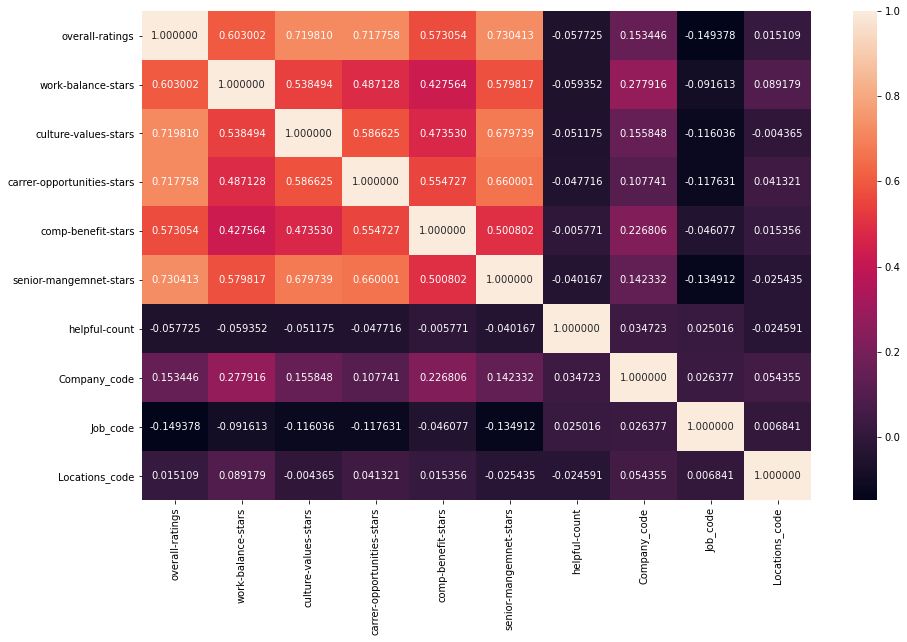

In [26]:
plt.figure(figsize=(15, 9))
sns.heatmap(corr_matrix, annot=True, fmt="f");

### From now on our analysis is based on each Company

**Google**

In [28]:
# google=data[data['company']=='google']
# google.to_csv('google.csv')

**amazon**

In [35]:
# amazon=data[data['company']=='amazon']
# amazon.to_csv('amazon.csv')

**apple**

In [39]:
# apple=data[data['company']=='apple']
# apple.to_csv('apple.csv')

**microsoft**

In [43]:
# microsoft=data[data['company']=='microsoft']
# microsoft.to_csv('microsoft.csv')

**netflix**

In [47]:
# netflix=data[data['company']=='netflix']
# netflix.to_csv('netflix.csv')

**facebook**

In [51]:
# facebook=data[data['company']=='facebook']
# facebook.to_csv('facebook.csv')

### facebook

LASCIO QUESTA CELLA PERCHE' NEL NOTEBOOK FACEBOOK IL GRAFO NON VIENE COSI BELLO, FORSE PERCHE' NON RIESCO A INSTALLARE econml

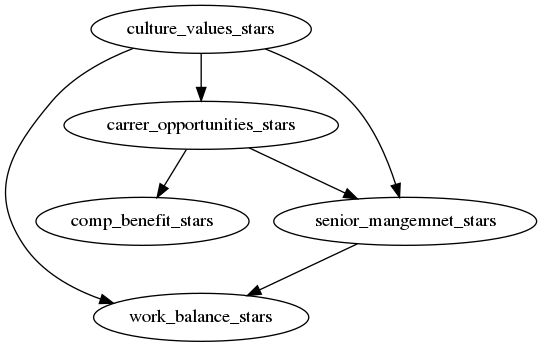

In [102]:
#here we use the DAG schema obtained with Hillclimsearch algorithm
outcome='work_balance_stars'
treatment='culture_values_stars'

model_fb= CausalModel(
        data = df_test_fb,
        graph=causal_graph_facebook.replace("\n", " "),
        treatment=treatment,
        outcome=outcome
)
model_fb.view_model()
display(Image(filename='causal_model.png'))